# **Import Libraries & Download Data**

In [1]:
print("Download libraries")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download libraries


In [2]:
data_cipher = pd.read_csv(r'.\C_and_D_png\files_csv\cifrado.csv')
data_decoded = pd.read_csv(r'.\C_and_D_png\files_csv\descifrado.csv')

In [3]:
data_cipher.head()

,Time,Pixel_Value,Ciphered_Value,Image_Pixel_Value_
0,0.001003,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
1,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
2,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
3,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
4,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"


In [4]:
data_decoded.head()

,Time,Ciphered_Value,Pixel_Value
0,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
1,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
2,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
3,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
4,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"


# **Algorithm RSA: Image**

## **Cipher & Decoded Time**

### **Cipher Time**

In [5]:
data_cipher.describe()

,Time
count,110760.000000
mean,0.000010
std,0.000189
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.041001


In [6]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.0000 
# Time max: 0.021001
# Time mean: 0.000006

In [9]:
Time_count = data_cipher['Time'].value_counts()
Time_count

Time
0.000000    109754
0.001000        67
0.001000        63
0.001000        52
0.000999        39
             ...  
0.000983         1
0.001009         1
0.000992         1
0.000993         1
0.041001         1
Name: count, Length: 154, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_13944\2019283415.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Time_counts_filtered.index.astype(str), y=Time_counts_filtered.values, palette="viridis")


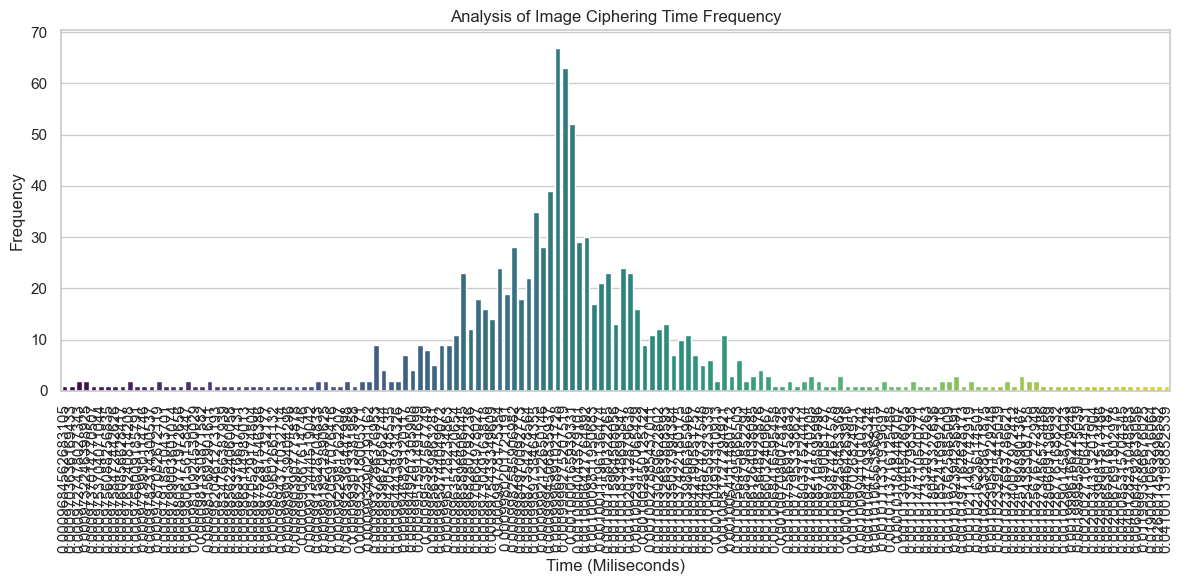

In [36]:
# Filter
Time_counts_filtered = Time_count.loc[(Time_count < Time_count.max())].sort_index() # Time_count.max(): 66187
# Bar plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=Time_counts_filtered.index.astype(str), y=Time_counts_filtered.values, palette="viridis")
plt.xlabel('Time (Miliseconds)')
plt.ylabel('Frequency')
plt.title('Analysis of Image Ciphering Time Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Decoded Time**

In [12]:
data_decoded.head()

,Time,Ciphered_Value,Pixel_Value
0,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
1,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
2,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
3,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"
4,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)"


In [13]:
data_decoded.describe()

,Time
count,110760.000000
mean,0.000010
std,0.000150
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.026004


In [11]:
# Time to cipher one pixel (X,X,X,X) in miliseconds:
# Time min: 0.000008
# Time max: 0.015016	
# Time mean: 0.000008 

In [16]:
Time_count_decoded = data_decoded['Time'].value_counts()
Time_count_decoded

Time
0.000000    109761
0.001000        57
0.001000        50
0.001000        49
0.001000        46
             ...  
0.000981         1
0.000993         1
0.002001         1
0.001014         1
0.000985         1
Name: count, Length: 178, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_13944\4258673952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Time_counts_filtered.index.astype(str), y=Time_counts_filtered.values, palette="viridis")


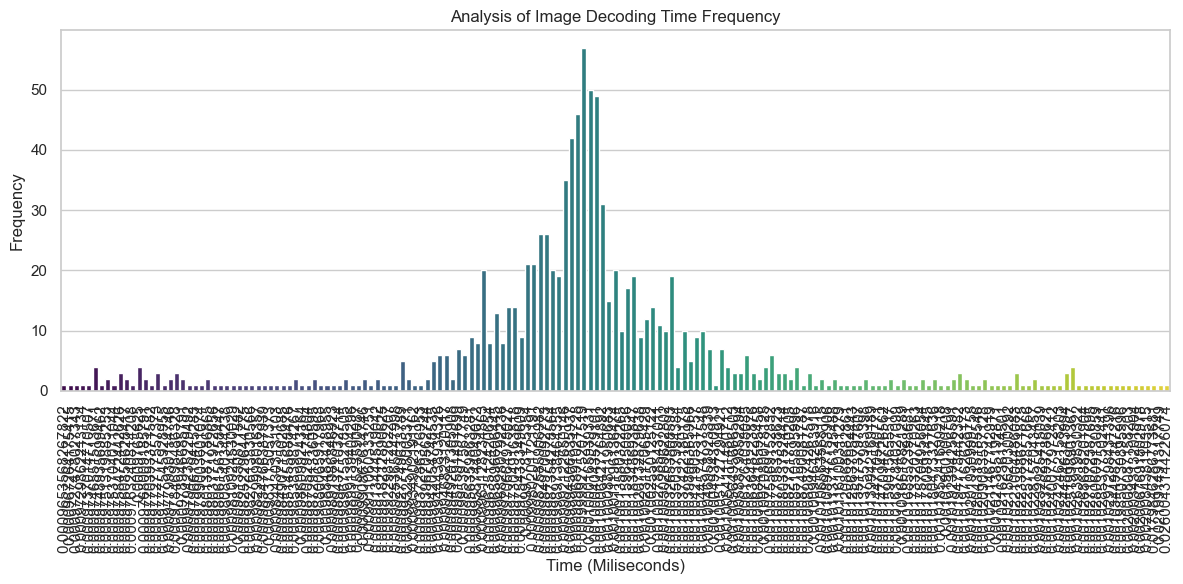

In [37]:
# Filter
Time_counts_filtered = Time_count_decoded.loc[(Time_count_decoded < Time_count_decoded.max())].sort_index() # Time_count_decoded.max(): 66187
# Crear el gráfico de barras
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=Time_counts_filtered.index.astype(str), y=Time_counts_filtered.values, palette="viridis")
plt.xlabel('Time (Miliseconds)')
plt.ylabel('Frequency')
plt.title('Analysis of Image Decoding Time Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Pixel Value & Intensity**

### **Are the images different?**

In [19]:
# Method Haslib to verify if the images are different or not. Colissions
import hashlib

def sha256_hash(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):
            sha256.update(chunk)
            
    return sha256.hexdigest()

orginal_image = sha256_hash('./C_and_D_png/homero.png')
decoded_image = sha256_hash('./C_and_D_png/resultados/descifrado.png')
print(orginal_image)
print(decoded_image)
if (orginal_image == decoded_image ):
    print("Are the same image")
    
print("The images are differents")

16462b82a574fc6c2bdcb729bd0b5cf379db1509d596e0b7439e5a9a998e1762
725df52f75dbc4e4e03d6cc2619bdd23c5896934712e992cf5f09b756dcf071d
The images are differents


### **Are the Pixel Values different?**

In [20]:
# Convertir la columna Pixel_Value a lista de tuplas si no lo está
data_cipher['Pixel_Value'] = data_cipher['Pixel_Value'].apply(eval)  # Convertir cadena a tupla 

# Pixel_Value de cuatro elementos
assert all(len(pixel) == 4 for pixel in data_cipher['Pixel_Value'])

# Dividir cada tupla en elementos individuales
data_cipher[['R', 'G', 'B', 'A']] = pd.DataFrame(data_cipher['Pixel_Value'].tolist(), columns=['R', 'G', 'B', 'A'])


In [21]:
# Convertir la columna Pixel_Value a lista de tuplas si no lo está
data_decoded['Pixel_Value'] = data_decoded['Pixel_Value'].apply(eval)   # Convertir cadena a tupla 

# Pixel_Value de cuatro elementos
assert all(len(pixel) == 4 for pixel in data_decoded['Pixel_Value']), "Pixel_Value no tiene tuplas de cuatro elementos"

# Dividir cada tupla en elementos individuales
data_decoded[['R', 'G', 'B', 'A']] = pd.DataFrame(data_decoded['Pixel_Value'].tolist(), columns=['R', 'G', 'B', 'A'])

In [22]:
data_cipher.head()

,Time,Pixel_Value,Ciphered_Value,Image_Pixel_Value_,R,G,B,A
0,0.001003,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
1,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
2,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
3,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
4,0.000000,"(255, 255, 255, 255)","(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255


In [23]:
data_decoded.head()

,Time,Ciphered_Value,Pixel_Value,R,G,B,A
0,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
1,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
2,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
3,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255
4,0.0,"(836048, 836048, 836048, 836048)","(255, 255, 255, 255)",255,255,255,255


In [24]:
# Pixels
data = data_cipher.loc[(data_cipher['Pixel_Value'] != data_decoded['Pixel_Value'])]
data.count()

Time                  0
Pixel_Value           0
Ciphered_Value        0
Image_Pixel_Value_    0
R                     0
G                     0
B                     0
A                     0
dtype: int64

In [25]:
data = data_cipher.loc[
    (data_cipher['R'] != data_decoded['R']) | 
    (data_cipher['G'] != data_decoded['G']) | 
    (data_cipher['B'] != data_decoded['B']) | 
    (data_cipher['A'] != data_decoded['A'])
]
data.count()

Time                  0
Pixel_Value           0
Ciphered_Value        0
Image_Pixel_Value_    0
R                     0
G                     0
B                     0
A                     0
dtype: int64

In [26]:
# The pixel values are the same, so what's going on?

In [27]:
# Method Haslib to verify if the images are different or not
import hashlib
def sha256_hash(file_path):
    sha256 = hashlib.sha256()
    with open(file_path, 'rb') as file:
        while chunk := file.read(8192):
            sha256.update(chunk)
            
    return sha256.hexdigest()

orginal_image = sha256_hash('./C_and_D_png/homero.png')
decoded_image = sha256_hash('./C_and_D_png/resultados/descifrado.png')
print(orginal_image)
print(decoded_image)
if (orginal_image == decoded_image ):
    print("Are the same image")
    
print("The images are differents")

16462b82a574fc6c2bdcb729bd0b5cf379db1509d596e0b7439e5a9a998e1762
725df52f75dbc4e4e03d6cc2619bdd23c5896934712e992cf5f09b756dcf071d
The images are differents


### **Are the pixel intensity values different?** 

#### **Original Image**

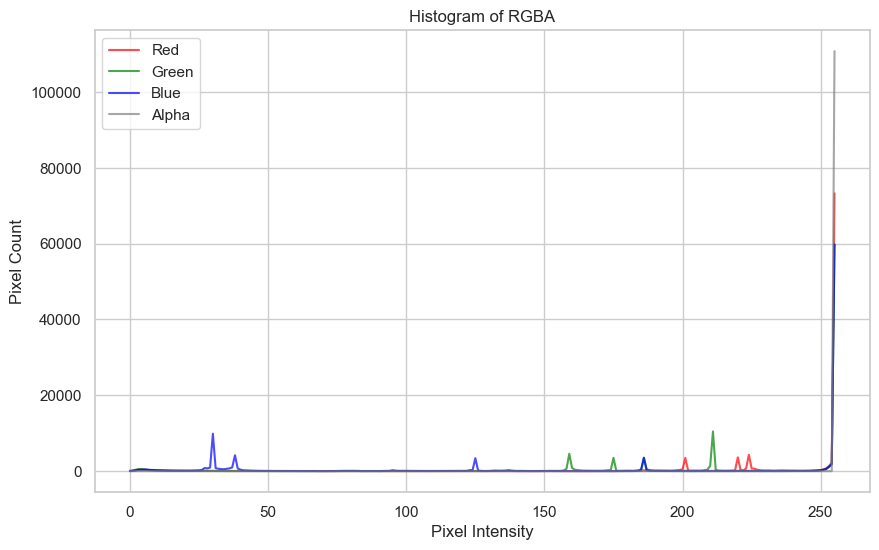

In [31]:
# Rutas de las imágenes
# path1 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\homero.png'
# path2 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\resultados\cifrado.png'
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open image
image_path = r'C:\Users\user\Redes\Cryptography_RSA-AES\C_and_D_png\homero.png'
image = Image.open(image_path)

# Image to numpy array
image_array = np.array(image)

# RGBA or RGB
if image_array.shape[2] == 4:
    has_alpha = True
else:
    has_alpha = False

# Calcular los histogramas para RGB y Alfa si está presente
histogram_r = np.histogram(image_array[:, :, 0], bins=256, range=(0, 256))[0]
histogram_g = np.histogram(image_array[:, :, 1], bins=256, range=(0, 256))[0]
histogram_b = np.histogram(image_array[:, :, 2], bins=256, range=(0, 256))[0]

if has_alpha:
    histogram_a = np.histogram(image_array[:, :, 3], bins=256, range=(0, 256))[0]

# Histogram
plt.figure(figsize=(10, 6))
plt.title('Histogram of RGBA')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.plot(histogram_r, color='red', alpha=0.7, label='Red')
plt.plot(histogram_g, color='green', alpha=0.7, label='Green')
plt.plot(histogram_b, color='blue', alpha=0.7, label='Blue')

if has_alpha:
    plt.plot(histogram_a, color='gray', alpha=0.7, label='Alpha')

plt.legend()
plt.grid(True)
plt.show()

#### **Cipher or Decoded Image**

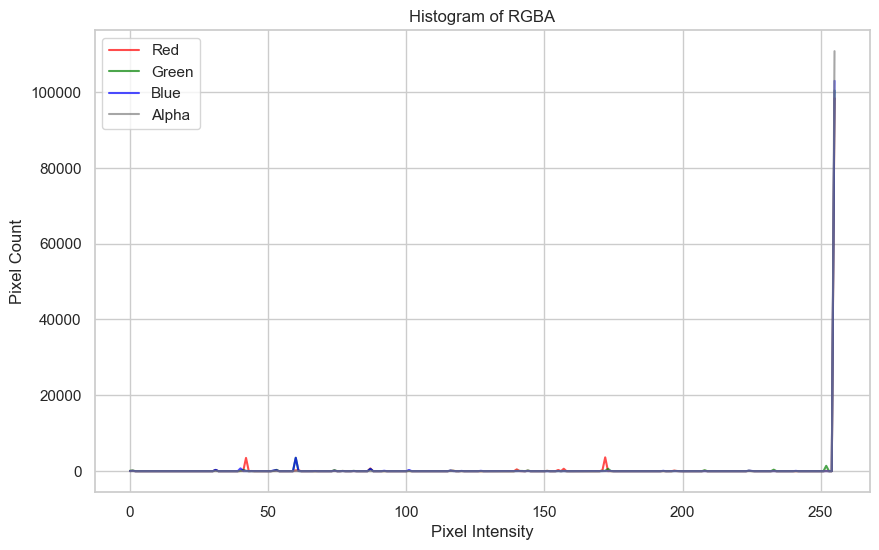

In [38]:
# Rutas de las imágenes
# path1 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\homero.png'
# path2 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\resultados\cifrado.png'
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open image
image_path = r'C:\Users\user\Redes\Cryptography_RSA-AES\C_and_D_png\resultados\cifrado.png'
image = Image.open(image_path)

# Image to numpy array
image_array = np.array(image)

# RGBA or RGB
if image_array.shape[2] == 4:
    has_alpha = True
else:
    has_alpha = False

# Calcular los histogramas para RGB y Alfa si está presente
histogram_r = np.histogram(image_array[:, :, 0], bins=256, range=(0, 256))[0]
histogram_g = np.histogram(image_array[:, :, 1], bins=256, range=(0, 256))[0]
histogram_b = np.histogram(image_array[:, :, 2], bins=256, range=(0, 256))[0]

if has_alpha:
    histogram_a = np.histogram(image_array[:, :, 3], bins=256, range=(0, 256))[0]

# Histogram
plt.figure(figsize=(10, 6))
plt.title('Histogram of RGBA')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixel Count')
plt.plot(histogram_r, color='red', alpha=0.7, label='Red')
plt.plot(histogram_g, color='green', alpha=0.7, label='Green')
plt.plot(histogram_b, color='blue', alpha=0.7, label='Blue')

if has_alpha:
    plt.plot(histogram_a, color='gray', alpha=0.7, label='Alpha')

plt.legend()
plt.grid(True)
plt.show()

## **Information of the images**

In [ ]:
from PIL import Image, ExifTags
import os
import pandas as pd

# Rutas de las imágenes en Google Colab (ejemplo)
path1 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\homero.png'
path2 = r'C:\Users\user\Redes\Criptografy_RSA-AES\C_and_D_png\resultados\descifrado.png'

def get_image_info(image_path):
    
    image = Image.open(image_path)

    # Get file size
    file_size_kb = os.path.getsize(image_path) / 1024  

    info_dict = {
        "Filename": image_path,
        "Image Size": image.size,
        "Image Height": image.height,
        "Image Width": image.width,
        "Image Format": image.format,
        "Image Mode": image.mode,
        "Image is Animated": getattr(image, "is_animated", False),
        "Frames in Image": getattr(image, "n_frames", 1),
        "File Size (KB)": file_size_kb  # Tamaño del archivo en KB
    }

    # Get EXIF DATA: es un estándar de metadatos para archivos de imágenes digitales que incluye información 
    # técnica y de configuración capturada automáticamente por la cámara.
    exifdata = image.getexif()
    if exifdata:
        for tag_id, value in exifdata.items():
            tag = ExifTags.TAGS.get(tag_id, tag_id)
            # Decodificar bytes si es necesario
            if isinstance(value, bytes):
                value = value.decode()
            info_dict[tag] = value

    image.close()
    return info_dict

info1 = get_image_info(path1)
info2 = get_image_info(path2)

df = pd.DataFrame([info1, info2])
df

,Filename,Image Size,Image Height,Image Width,Image Format,Image Mode,Image is Animated,Frames in Image,File Size (KB)
0,C:\Users\user\Redes\Criptografy_RSA-AES\C_and_...,"(312, 355)",355,312,PNG,RGBA,False,1,87.810547
1,C:\Users\user\Redes\Criptografy_RSA-AES\C_and_...,"(312, 355)",355,312,PNG,RGBA,False,1,82.290039


In [ ]:
# Why is there a loss of information after the image is decoded, knowing that the pixel values are the same as the original after decryption?